<a href="https://colab.research.google.com/github/Ayushi1429/Telco-Customer-Churn-Analysis/blob/main/Telco_Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Upload the File from Your System**

In [2]:
from google.colab import files
uploaded = files.upload()



Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


**Step 2: Load the Dataset After Upload**

In [3]:
import pandas as pd

# Load using uploaded filename
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show shape and sample
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**STEP 3: Dataset Overview**

In [4]:
# Check column data types and nulls
df.info()

# Check total missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**STEP 4: Quick Stats Summary**

In [5]:
# For numerical columns
df.describe()

# For categorical columns
df.describe(include='object')


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


**STEP 5: Convert TotalCharges to Numeric**

In [6]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check how many became NaN after conversion
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())


Missing values in TotalCharges: 11


**STEP 6: Drop Missing TotalCharges Rows**


In [7]:
# Drop rows with NaN in TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Check shape
print("New shape after cleaning:", df.shape)


New shape after cleaning: (7032, 21)


**STEP 7: Exploratory Data Analysis (EDA)**

*🔹 1. Check Churn Distribution (Overall)*

/tmp/ipython-input-8-4068978244.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


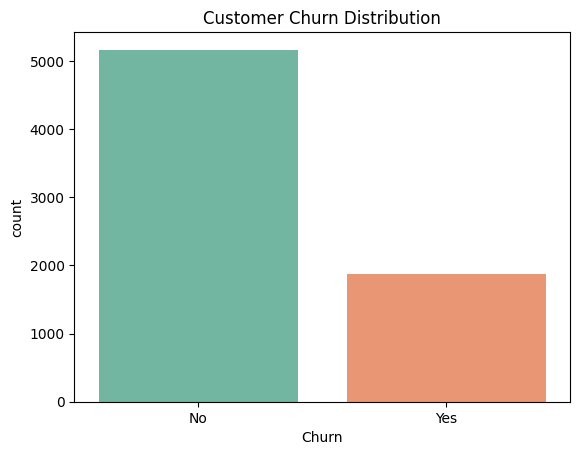

,proportion
Churn,
No,73.421502
Yes,26.578498


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of Churn
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

# Churn percentages
df['Churn'].value_counts(normalize=True) * 100


*🔹 2. Churn by Gender*

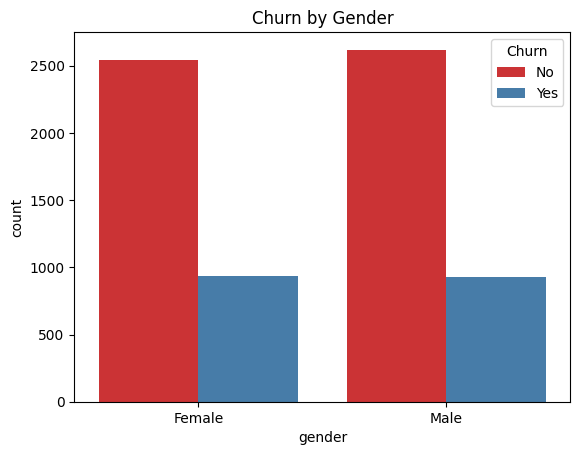

In [9]:
sns.countplot(data=df, x='gender', hue='Churn', palette='Set1')
plt.title("Churn by Gender")
plt.show()


*🔹 3. Churn by Contract Type*

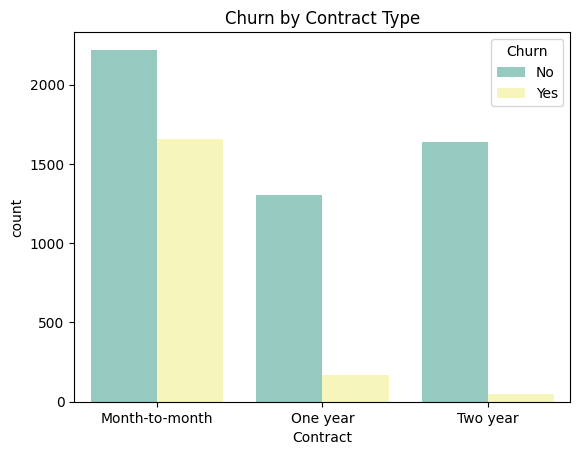

In [10]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set3')
plt.title("Churn by Contract Type")
plt.show()


*🔹 4. Monthly Charges vs Churn*

/tmp/ipython-input-11-1450907730.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')


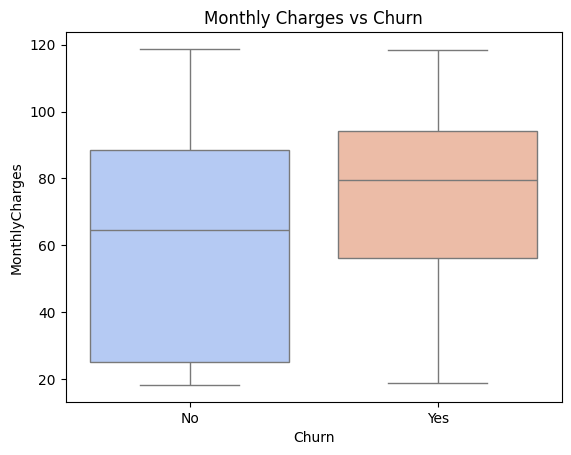

In [11]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title("Monthly Charges vs Churn")
plt.show()
